### Implementing Interpolation Search and Jump Search

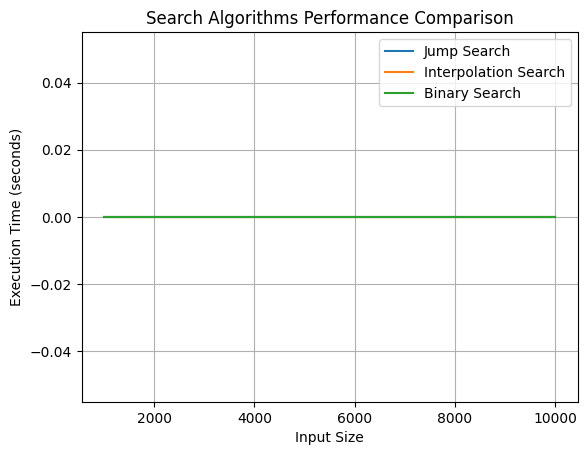

In [1]:
import time
import math
import random
import matplotlib.pyplot as plt

def jump_search(arr, target):
    n = len(arr)
    step = int(math.sqrt(n))
    prev = 0
    while prev < n and arr[min(step, n) - 1] < target:
        prev = step
        step += int(math.sqrt(n))
        if prev >= n:
            return -1
    for i in range(prev, min(step, n)):
        if arr[i] == target:
            return i
    return -1

def interpolation_search(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high and arr[low] <= target <= arr[high]:
        pos = low + ((target - arr[low]) * (high - low) // (arr[high] - arr[low]))
        if pos < 0 or pos >= len(arr):
            return -1
        if arr[pos] == target:
            return pos
        if arr[pos] < target:
            low = pos + 1
        else:
            high = pos - 1
    return -1

def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

sizes = [1000, 5000, 10000]
jump_times = []
interpolation_times = []
binary_times = []

for size in sizes:
    arr = sorted(random.sample(range(1, size * 10), size))
    target = random.choice(arr)

    start = time.time()
    jump_search(arr, target)
    jump_times.append(time.time() - start)

    start = time.time()
    interpolation_search(arr, target)
    interpolation_times.append(time.time() - start)

    start = time.time()
    binary_search(arr, target)
    binary_times.append(time.time() - start)

plt.plot(sizes, jump_times, label='Jump Search')
plt.plot(sizes, interpolation_times, label='Interpolation Search')
plt.plot(sizes, binary_times, label='Binary Search')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Search Algorithms Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()
